In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

# load the dataset using the builtin Keras method (X_train: images, y_train: labels)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train_new = np.array([])
y_test_new = np.array([])

for i in y_train:
    if i == 1 or i == 7:
        i = 1
    elif i == 0 or i == 6 or i == 8 or i == 9:
        i = 0
    elif i == 2 or i == 5:
        i = 2
    elif i == 3 or i == 4:
        i = 3
    y_train_new = np.append(y_train_new, i)
    
for i in y_test:
    if i == 1 or i == 7:
        i = 1
    elif i == 0 or i == 6 or i == 8 or i == 9:
        i = 0
    elif i == 2 or i == 5:
        i = 2
    elif i == 3 or i == 4:
        i = 3
    y_test_new = np.append(y_test_new, i)

y_train_n = y_train_new.astype(np.uint8)
y_test_n = y_test_new.astype(np.uint8)

In [2]:
#import sys
#import numpy
#numpy.set_printoptions(threshold=sys.maxsize)
#print(y_train_new)
print(y_train_n.shape)
print('Dimensionality of the training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)
print()
print(y_test_n.shape)
print('Dimensionality of the test image dataset and labels:')
print(X_test.shape)
print(y_test.shape)

(60000,)
Dimensionality of the training image dataset and labels:
(60000, 28, 28)
(60000,)

(10000,)
Dimensionality of the test image dataset and labels:
(10000, 28, 28)
(10000,)


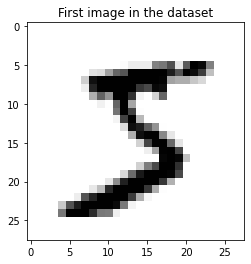

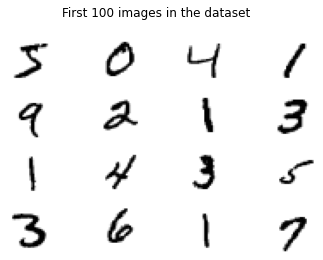

In [3]:
# show the first image in the dataset
plt.figure()
plt.imshow(X_train[0], cmap='gray_r', vmin=0, vmax=255)
plt.title('First image in the dataset')

# show the first 16 images in the dataset in a 4x4 gird
fig = plt.figure()
for n in range(16):
    ax = fig.add_subplot(4, 4, n + 1)
    plt.imshow(X_train[n], cmap='gray_r', vmin=0, vmax=255)
    plt.axis('off')
fig.suptitle('First 100 images in the dataset')
plt.show()

In [4]:
# print the labels of the first 16 images in the dataset
print('Labels of the first 16 images in the dataset:')
print(y_train[:16])
print(y_train_n[:16])
print(y_test[:16])
print(y_test_n[:16])

# derive a validation set from the training set
# the original training set is split into
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train_n, y_val_n = train_test_split(y_train_n, test_size=0.10, random_state=101)

print('Dimensionality of the new training image dataset and labels:')
print(X_train.shape)
print(y_train_n.shape)

print('Dimensionality of the validation image dataset and labels:')
print(X_val.shape)
print(y_val_n.shape)

Labels of the first 16 images in the dataset:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]
[2 0 3 1 0 2 1 3 1 3 3 2 3 0 1 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]
[1 2 1 0 3 1 3 0 2 0 0 0 0 0 1 2]
Dimensionality of the new training image dataset and labels:
(54000, 28, 28)
(54000,)
Dimensionality of the validation image dataset and labels:
(6000, 28, 28)
(6000,)


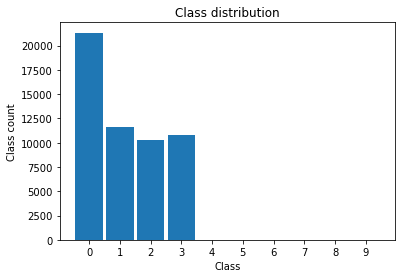

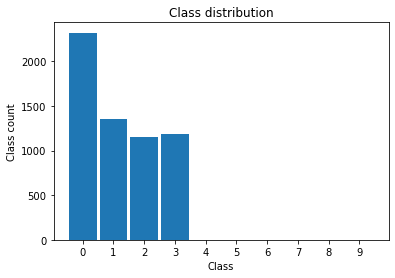

In [5]:
def plt_classes(y, num_class=10):
    plt.figure()
    plt.hist(y, bins=range(0, num_class + 1), align='left', rwidth=0.9)
    plt.xlabel('Class')
    plt.ylabel('Class count')
    plt.xticks(range(0, num_class))
    plt.title('Class distribution')


# show the class label distribution in the training dataset
plt_classes(y_train_n)

# show the class label distribution in the validation dataset
plt_classes(y_val_n)

In [6]:
# the shape of the data matrix is NxHxW, where N is the number of images, H and W are the height and width of the images
# keras expect the data to have shape NxHxWxC, where C is the channel dimension
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_val = np.reshape(X_val, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))
# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

In [7]:
# class label preprocessing for keras

# we see that we have a 1D-array with length 54000
print(y_train_n.shape)

# since we have 4 different classes, what does this array look like?
# let's look at the first 20 labels
print(y_train_n[:20])

# convert 1D class arrays to 4D class matrices
y_train_n = to_categorical(y_train_n, 4)
y_val_n = to_categorical(y_val_n, 4)
y_test_n = to_categorical(y_test_n, 4)

# check the output
print(y_train_n.shape)
# this is now a one-hot encoded matrix
print(y_train_n[:20])

(54000,)
[1 3 0 2 1 0 1 2 0 0 1 0 0 2 1 2 3 2 1 2]
(54000, 4)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [8]:
model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28, 28, 1)))
# ten fully connected layers with 128 neurons and ReLU nonlinearity (optimal amount found in exercise 1)
for i in range(0,10):
    model.add(Dense(128, activation='relu'))           
# output layer with 4 nodes (one for each class) and softmax nonlinearity
model.add(Dense(4, activation='softmax'))

In [9]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name = "exercise_3_3"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model.fit(X_train, y_train_n, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_n),
          callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.1115 - accuracy: 0.5039 - val_loss: 0.3075 - val_accuracy: 0.8950
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2359 - accuracy: 0.9220 - val_loss: 0.1881 - val_accuracy: 0.9405
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9566 - val_loss: 0.1636 - val_accuracy: 0.9485
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1056 - accuracy: 0.9672 - val_loss: 0.1133 - val_accuracy: 0.9652
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0794 - accuracy: 0.9750 - val_loss: 0.1018 - val_accuracy: 0.9678
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0649 - accuracy: 0.9794 - val_loss: 0.0966 - val_accuracy: 0.9698
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0559 - accuracy: 0.9828 - val_loss: 0.0985 - val_accuracy:

In [10]:
score = model.evaluate(X_test, y_test_n, verbose=0)

print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.08362658321857452
Accuracy:  0.9761999845504761
